# Orders - Multivariate Regression of  the `review_score`

In [2]:
%load_ext autoreload
%autoreload 2

In [8]:
# Import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

Utilizar de dataset el resultado de la clase pasada (con la distancia)



In [18]:
orders = pd.read_csv("/Users/lolonastri/Desktop/POO_UCEMA/trabajos_practicos/tp_datos/2-ecommerce/data/tablon_primario.csv")
orders.head()

,,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,...,tiempo_de_espera_esperado,real_vs_esperado,es_cinco_estrellas,es_una_estrella,review_score,num_de_produc,vendedores_unicos,precio,transporte,distancia_entre_cliente_y_vendedor
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,...,15.544063,0.0,0,0,4,1,1,29.99,8.72,18.063837
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,...,19.137766,0.0,0,0,4,1,1,118.70,22.76,856.292580
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,...,26.639711,0.0,1,0,5,1,1,159.90,19.22,514.130333
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,...,26.188819,0.0,1,0,5,1,1,45.00,27.20,1822.800366
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,...,12.112049,0.0,1,0,5,1,1,19.90,8.72,30.174037


Let's recall our simple analysis from yesterday's exercise: 

¿ A qué esta correlacionada `review_score`?
 * Si dos variables tmb tienen correlación entre sí deberíamos analizarla por separado
  *  Probar con `statsmodels`: `tiempo_de_espera` y `real_vs_esperado`

In [27]:
from olist.preprocess import whitespace_remover_and_columns
orders = whitespace_remover_and_columns(orders)

In [28]:
round(orders.corr(numeric_only=True),2)

,,time_delta,tiempo_de_espera_real,tiempo_de_espera_esperado,real_vs_esperado,es_cinco_estrellas,es_una_estrella,review_score,num_de_produc,vendedores_unicos,precio,transporte,distancia_entre_cliente_y_vendedor
,1.00,0.00,0.00,0.01,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
time_delta,0.00,1.00,1.00,0.38,0.70,-0.23,0.31,-0.33,-0.02,-0.04,0.06,0.17,0.39
tiempo_de_espera_real,0.00,1.00,1.00,0.39,0.70,-0.23,0.31,-0.33,-0.02,-0.04,0.06,0.17,0.39
tiempo_de_espera_esperado,0.01,0.38,0.39,1.00,0.01,-0.05,0.03,-0.05,0.02,0.02,0.08,0.24,0.51
real_vs_esperado,0.00,0.70,0.70,0.01,1.00,-0.16,0.28,-0.27,-0.01,-0.02,0.02,0.02,0.07
es_cinco_estrellas,0.00,-0.23,-0.23,-0.05,-0.16,1.00,-0.40,0.79,-0.07,-0.07,-0.01,-0.06,-0.06
es_una_estrella,0.00,0.31,0.31,0.03,0.28,-0.40,1.00,-0.81,0.12,0.10,0.04,0.08,0.04
review_score,-0.00,-0.33,-0.33,-0.05,-0.27,0.79,-0.81,1.00,-0.12,-0.12,-0.03,-0.09,-0.06
num_de_produc,0.00,-0.02,-0.02,0.02,-0.01,-0.07,0.12,-0.12,1.00,0.29,0.15,0.44,-0.02
vendedores_unicos,0.00,-0.04,-0.04,0.02,-0.02,-0.07,0.10,-0.12,0.29,1.00,0.04,0.13,-0.01


<Axes: >

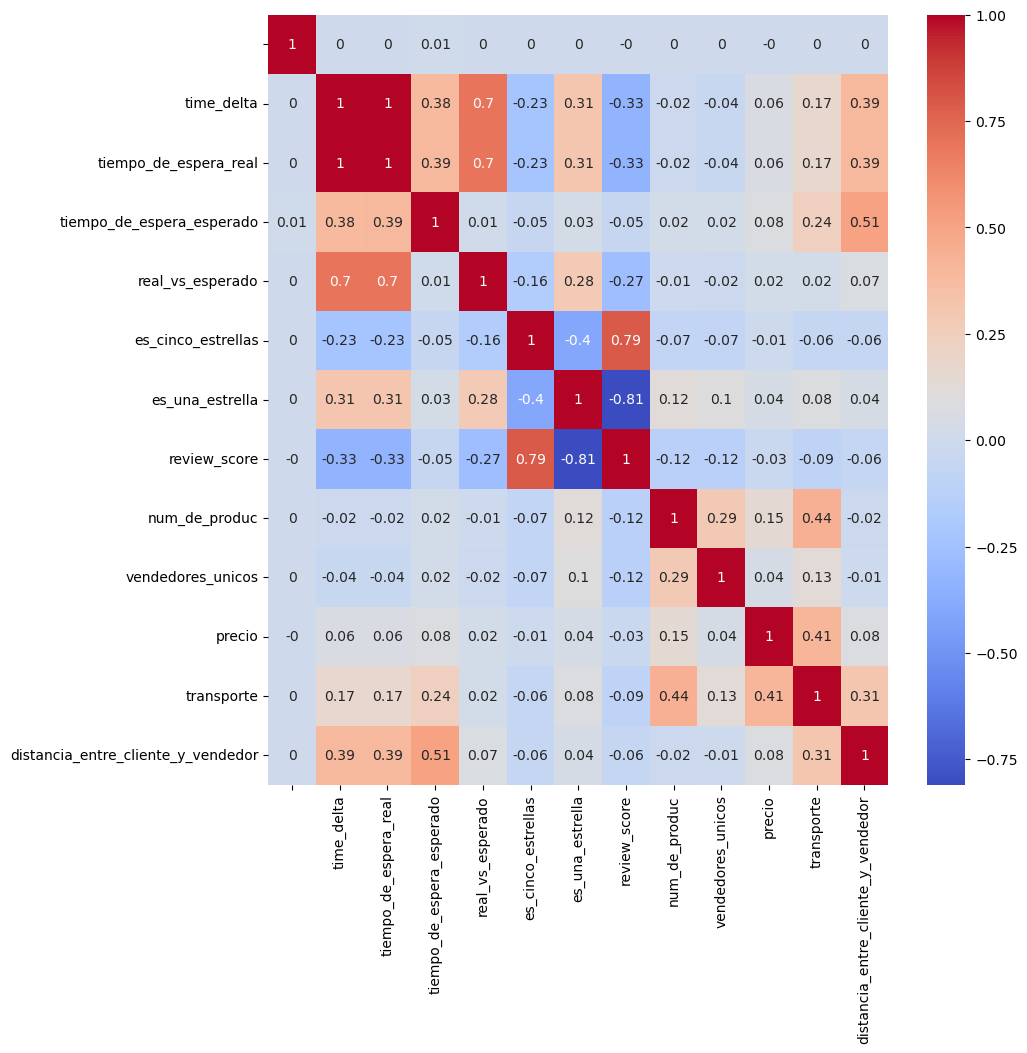

In [36]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    round(orders.corr(numeric_only=True),2), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10}
)

___

## 1 - Regresión Univariada

Usar [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) con `statsmodels.formula.api`
 - `model1`: una regresión ols de `review_score` sobre `tiempo_de_espera`
 - `model2`: una regresión ols de `review_score` sobre `real_vs_esperado`

Para cada uno, imprima la tabla `summary` e interprete los resultados:
- Entender cómo estos resultados coinciden con los del diagrama de seaborn
- Interpretar `R-squared`, así como `coeficientes de regresión individuales`, `valores t`, `valores p` e `intervalos de confianza del 95 %`

___

***Modelo 1***:

In [45]:
import statsmodels.formula.api as smf
modelo1 = smf.ols(formula='review_score ~ tiempo_de_espera_real', data=orders)
modelo1 = modelo1.fit()
print(modelo1.summary())


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.204e+04
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:59:17   Log-Likelihood:            -1.5439e+05
No. Observations:               95857   AIC:                         3.088e+05
Df Residuals:                   95855   BIC:                         3.088e+05
Df Model:                           1                                         
Covariance Type:            nonrobust  

##### → R-squared = 0.112. Indica que solamente el 11.2% de la variación de la variable dependiente (review_score) es explicada por la variable independiente (tiempo_de_espera). El otro 88.8% de la variación de la variable dependiente (review_score) es explicada por otras variables que no están incluidas en el modelo.

##### → Coeficientes de regresión individuales
 

In [ ]:
##### → R-squared = 0.112. Indica que solamente el 11.2% de la variación de la variable dependiente (review_score) es explicada por la variable independiente (tiempo_de_espera). El otro 88.8% de la variación de la variable dependiente (review_score) es explicada por otras variables que no están incluidas en el modelo.

##### → Coeficientes de regresión individuales
 

___

***Modelo 2***:

In [44]:
import statsmodels.formula.api as smf
modelo2 = smf.ols(formula='review_score ~ real_vs_esperado', data=orders)
modelo2 = modelo2.fit()
print(modelo2.summary())


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7681.
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:59:15   Log-Likelihood:            -1.5637e+05
No. Observations:               95857   AIC:                         3.127e+05
Df Residuals:                   95855   BIC:                         3.128e+05
Df Model:                           1                                         
Covariance Type:            nonrobust  

___

## 2 - Multivariate regression

***responder***
¿Cual es el impacto en `review_score` agregando un día más de `real_vs_esperado` manteniendo todo lo otro constante? ¿Cuál es más explicativa de `review_score`,`tiempo_de_espera` o `real_vs_esperado` ?



***Modelo 3***:

In [7]:
# Programar

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6191.
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:05:10   Log-Likelihood:            -1.5426e+05
No. Observations:               95872   AIC:                         3.085e+05
Df Residuals:                   95869   BIC:                         3.086e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.6502      0.008  

Nuestra regresión multivariante nos permite aislar el impacto de una característica, mientras controlamos el efecto de otras características. Estos nuevos coeficientes se denominan **`coeficientes de correlación parcial`**.

 R-squared es bastante bajo: no más del 12 % de las variaciones de review_score se explican por las variaciones combinadas de `tiempo_de_espera` y `real_vs_esperado`.

Intentemos agregar más variables a nuestra regresión para mejorar la explicabilidad de la regresión lineal.

Crear un nuevo OLS `model4` con más características del conjunto de datos `orders`.
- No agregar dos características perfectamente colineales entre sí
-  Transformar cada variables $X_i$ con el respectivo z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$  para comparar los coeficientes de regresión parcial $\beta_i$ en conjuntos.  $\beta_i$ no estará en la misma dimensión.

***Modelo 4***:

¿Que variables considerar?

In [8]:
orders.columns

Index(['Unnamed: 0', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'tiempo_de_espera', 'real_vs_esperado',
       'es_cinco_estrellas', 'es_una_estrella', 'review_score',
       'number_of_products', 'vendedores_unicos', 'precio', 'transporte',
       'distance_seller_customer'],
      dtype='object')

In [9]:
#select features
#features =

In [10]:
#standarizar features numericos

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_de_espera,real_vs_esperado,es_cinco_estrellas,es_una_estrella,review_score,number_of_products,vendedores_unicos,precio,transporte,distance_seller_customer
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-0.431192,-0.161774,0,0,4,-0.264583,-0.11254,-0.513828,-0.652036,-0.979449
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0.134174,-0.161774,0,0,4,-0.264583,-0.11254,-0.086651,0.000493,0.429798
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,-0.329907,-0.161774,1,0,5,-0.264583,-0.11254,0.111745,-0.164034,-0.145452
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.073540,-0.161774,1,0,5,-0.264583,-0.11254,-0.441549,0.206848,2.054711
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,-1.019535,-0.161774,1,0,5,-0.264583,-0.11254,-0.562416,-0.652036,-0.959089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95875,95875,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,-0.454309,-0.161774,1,0,5,-0.264583,-0.11254,-0.311532,-0.449399,-0.893005
95876,95876,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.023841,-0.161774,0,0,4,-0.264583,-0.11254,0.183976,-0.123135,-0.212755
95877,95877,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.305780,-0.161774,1,0,5,-0.264583,-0.11254,0.333688,1.964585,0.617689
95878,95878,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0.483664,-0.161774,0,0,2,1.601690,-0.11254,1.075217,2.715644,-0.387520


Crear el `modelo4`

In [11]:
formula = "review_score ~ " + ' + '.join(features)
formula

'review_score ~ tiempo_de_espera + real_vs_esperado + number_of_products + vendedores_unicos + precio + transporte + distance_seller_customer'

In [20]:
#

---
- ¿Cuáles son las características más importantes? (hacer un gráfico de barras para visualizarlos bien)
- ¿Cómo ha cambiado el rendimiento general de la regresión?
- ¿Es esta regresión estadísticamente significativa?

In [21]:
#


- ¿Cual es la variable que más impacto tiene?
- qué pasa con productos y vendedores cuando hay más?
- Que pasa con la distancia?
- Que pasa con precio y transporte?
    
- Qué pasa con F-statistics y p-value?

- Analizar R cuadrado

Un R cuadrado bajo es común cuando el número de observaciones (n) es mucho mayor que el número de características (p). Todavía se pueden derivar ideas relevantes de tales regresiones, siempre que sean estadísticamente significativas.





___

## 3 - Chequear la performance de modelos

¡El rendimiento de la regresión no debe medirse solo por su R-cuadrado!

Siempre visualice la distribución de las predicciones, y especialmente los residuales.

* Calcular los residuos.

Debería ver que la media de los residuos es igual a 0 (siempre verificado en un contexto de regresión lineal)

In [14]:
##codear

Computar rmse

In [15]:
##codear RMS (Buscar en wikipedia)

1.1883154116821097

Plotear los resultados

Text(0.5, 1.0, 'residuals density plot')

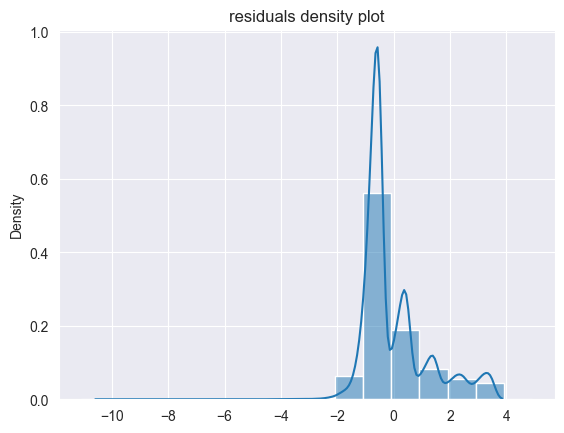

* ¿Por qué la trama residual tiene una forma tan extraña?

Plotea en el mismo gráfico tanto la distribución de `review_score` como la distribución de `predicted_review_score`.

Text(0.5, 1.0, 'distribution of predicted and actual values')

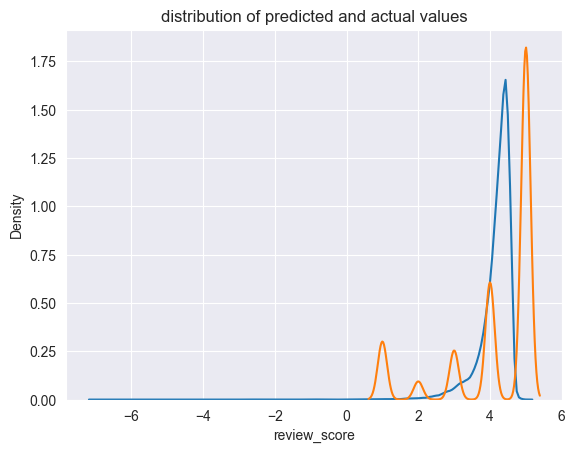

Usando `seaborn`, ya podríamos haber trazado una `línea de regresión` de `review_score` frente a `real_vs_esperado`

Hacelo con una sub-`muestra` de la población, y una vez con la `toda la población`.

(0.0, 5.942038100814559)

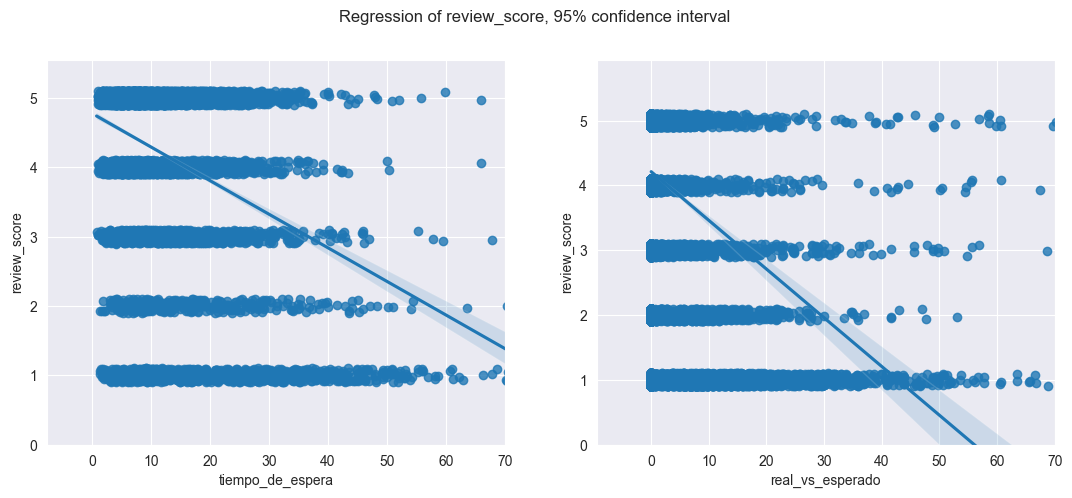